<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow :
There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other comination of variables, even shorter...predicting a number.

### Hyperparameter & Typical value :
* Input layer shape - Same shape as number of input features
* Hidden layer(s) - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific generally 10 to 100
* Output layer shape - Same shape as desired prediction shape
* Hidden Activation - Usually ReLU (rectified linear unit)
* Output Activation - None, ReLU, logistic/tanh
* Loss function - MSE (mean squared error) or MAE (mean absolute error) / Huber (combination of MAE/MSE) if outliers
* Optimizer - SGD (Stochastic gradient descent), ADAM

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit -

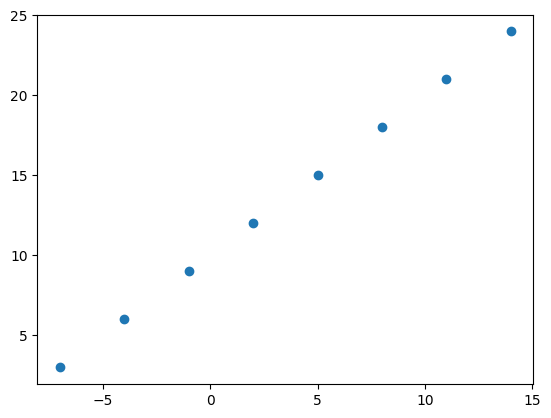

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features -
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels -
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it -
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes -

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [5]:
# Turn our numpy arrays into tensors with dtype as float 32.
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with Tensorflow -
- **Creating a model** - define the input and output layers, as well as the layers of a deeplearning model.
- **Compililng a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
- **Fitting the model** - letting the model try to find patterns between X and y (features and labels)

In [7]:
# Add one extra dimension to the input value to become compataible with the model.
X = tf.reshape(X, (-1, 1))

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mae is short form of mean absolute error

# 4. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 19.7847 - mae: 19.7847
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 19.5034 - mae: 19.5034
Epoch 3/5
1/1 [==============================] - 0s 37ms/step - loss: 19.2222 - mae: 19.2222
Epoch 4/5
1/1 [==============================] - 0s 32ms/step - loss: 18.9409 - mae: 18.9409
Epoch 5/5
1/1 [==============================] - 0s 22ms/step - loss: 18.6597 - mae: 18.6597


In [9]:
# # Optional methodology -
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try to make a prediction using our model:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 140ms/step


array([[-18.279005]], dtype=float32)

In [12]:
y_pred + 11

array([[-7.279005]], dtype=float32)

### Steps in modelling with Tensorflow -
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  * **Loss** - how wrong your model's predictions are compared to the truth labels (we need to minimise this).
  * **Optimizer** - how your model should update its internal patterns to better its predictions.
  * **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
  * **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)


## Improving our Model -
we can improve our model by altering our steps we took to create a model.
1. **Creating a Model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer ) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 864ms/step - loss: 7.7188 - mae: 7.7188
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 7.5863 - mae: 7.5863
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Let's see if our model's prediction has improved ...
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[30.025238]], dtype=float32)

In [16]:
# Let's see if we can make another change to improve our model -

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 439ms/step - loss: 14.4688 - mae: 14.4688
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.9180 - mae: 13.9180
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3715 - mae: 13.3715
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8439 - mae: 12.8439
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3132 - mae: 12.3132
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7828 - mae: 11.7828
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2538 - mae: 11.2538
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7218 - mae: 10.7218
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1695 - mae: 10.1695
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5917 - mae: 9.5917
Epoch 11/100
1/1 [==============================] -

In [17]:
# Let's remind ourselves of the data -
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[32.177746]], dtype=float32)

In [19]:
# Let's see if we can make another change to improve our model - now No activation function and reduced hidden units.

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 388ms/step - loss: 13.5743 - mae: 13.5743
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0107 - mae: 13.0107
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4460 - mae: 12.4460
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8772 - mae: 11.8772
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3016 - mae: 11.3016
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7160 - mae: 10.7160
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1174 - mae: 10.1174
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5028 - mae: 9.5028
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8689 - mae: 8.8689
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2126 - mae: 8.2126
Epoch 11/100
1/1 [==============================] - 0s 9

In [20]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[29.272707]], dtype=float32)

In [21]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 594ms/step - loss: 13.4390 - mae: 13.4390
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3674 - mae: 13.3674
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2957 - mae: 13.2957
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2240 - mae: 13.2240
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1524 - mae: 13.1524
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0807 - mae: 13.0807
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0090 - mae: 13.0090
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9372 - mae: 12.9372
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8655 - mae: 12.8655
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7937 - mae: 12.7937
Epoch 11/100
1/1 [==============================

In [22]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[31.994692]], dtype=float32)

In [23]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer with learning rate

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 554ms/step - loss: 13.3269 - mae: 13.3269
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2532 - mae: 13.2532
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1796 - mae: 13.1796
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1058 - mae: 13.1058
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0320 - mae: 13.0320
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9580 - mae: 12.9580
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8840 - mae: 12.8840
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8100 - mae: 12.8100
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7358 - mae: 12.7358
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6616 - mae: 12.6616
Epoch 11/100
1/1 [==============================] - 0

In [24]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[31.629194]], dtype=float32)

## Evaluating a model

In practice , typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


#### When it comes to evaluation ... there are 3 words you should memorize:
> "visualize, Visualize, Visualize"

It is always a good idea to visualize -
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The traning of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original lables).

In [25]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the dataset -
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

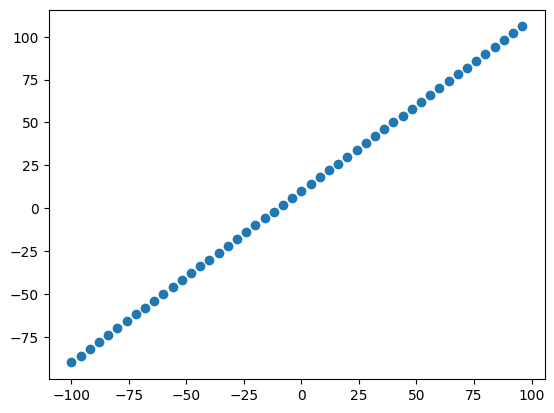

In [27]:
# Visualize the data:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [28]:
# Split the data into train and test sets -
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we have got our data in training and test sets...let's visualize it again

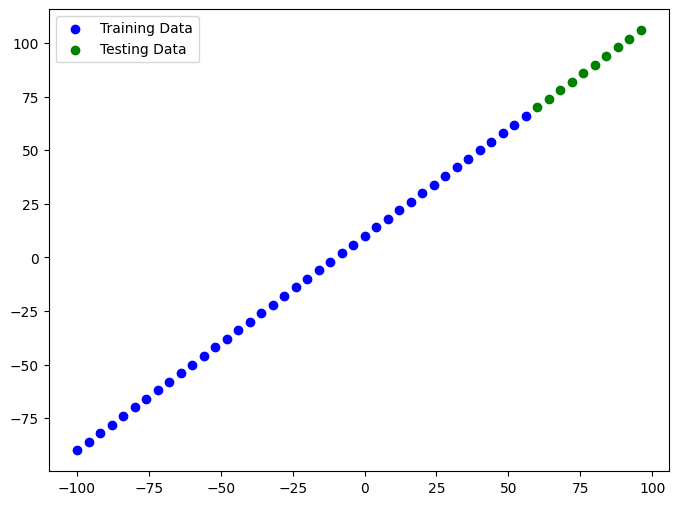

In [29]:
plt.figure(figsize =(8,6))
# Plot training data in blue-
plt.scatter(X_train, y_train, c='b', label = "Training Data") # Our model need to learn on this
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label = "Testing Data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data -

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [31]:
# model.summary()

In [32]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')  # Dense is a fully connected layer
], name='Model_1')
# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [33]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Let's fit our model with the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

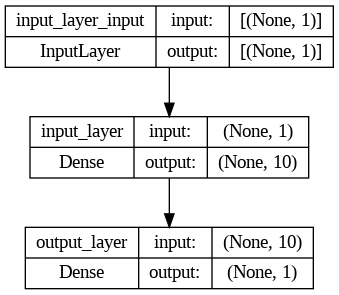

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)

### Visualizing our Model's predictions -

To visualize the predictions, it's a good practice to plot them against the ground truth labels.
often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)


In [36]:
# Make some predictions to create y_pred
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 54ms/step


array([[34.891697],
       [37.12122 ],
       [39.35075 ],
       [41.580273],
       [43.809795],
       [46.039318],
       [48.268845],
       [50.49837 ],
       [52.72789 ],
       [54.957417]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
X_train.shape

TensorShape([40])

In [39]:
y_preds.shape

(10, 1)

In [40]:
# Let's create a plotting function -
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """ Plots training data, test data and compares predictions to ground truth label """
  plt.figure(figsize=(8,6))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training Data')
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label ="Testing Data")
  #plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label = "Predictions")
  # Show the legend
  plt.legend();

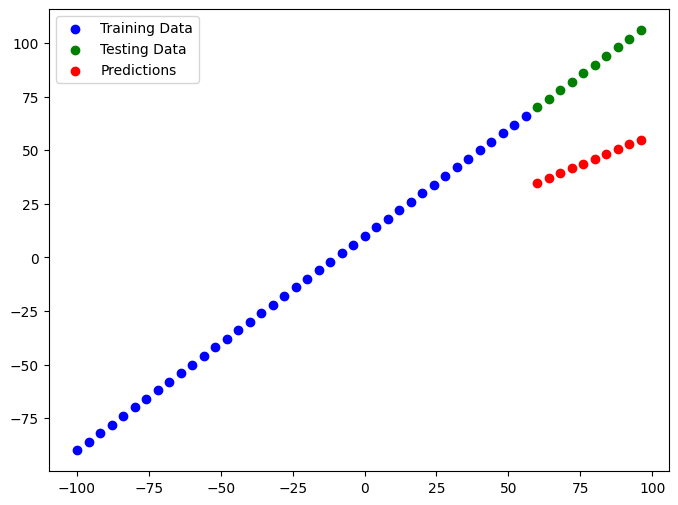

In [41]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics:
Depeneding on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main etrics:
* MAE - mean absolute error, " on average, how wrong is each of my model's predictions".

* MSE - Mean square error, "Square the average errors"

In [42]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 149ms/step - loss: 43.0754 - mae: 43.0754


[43.07544708251953, 43.07544708251953]

In [43]:
# Calaculate the mean absolute error -
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.1083  , 50.87878 , 48.64925 , 46.419727, 44.190205, 41.960682,
       39.731155, 37.50163 , 35.27211 , 33.042583], dtype=float32)>

In [44]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.891697],
       [37.12122 ],
       [39.35075 ],
       [41.580273],
       [43.809795],
       [46.039318],
       [48.268845],
       [50.49837 ],
       [52.72789 ],
       [54.957417]], dtype=float32)>

In [45]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.891697, 37.12122 , 39.35075 , 41.580273, 43.809795, 46.039318,
       48.268845, 50.49837 , 52.72789 , 54.957417], dtype=float32)>

In [46]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.075443>

In [47]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1881.3539>

In [48]:
# Make some functions to reuse MAE and MSE:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model
```
build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it ->evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between featureds and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the pattens in the data.

In [49]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

* Let's do 3 modelling expirements :
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
# 2. Compile a model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the Model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 33.9764 - mae: 33.9764
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3879 - mae: 9.3879
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8184 - mae: 11.8184
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2694 - mae: 9.2694
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1324 - mae: 10.1324
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4001 - mae: 9.4001
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5459 - mae: 8.5459
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0472 - mae: 9.0472
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.6803 - mae: 18.6803
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0783 - mae: 10.0783
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - lo

1/1 [==============================] - 0s 387ms/step


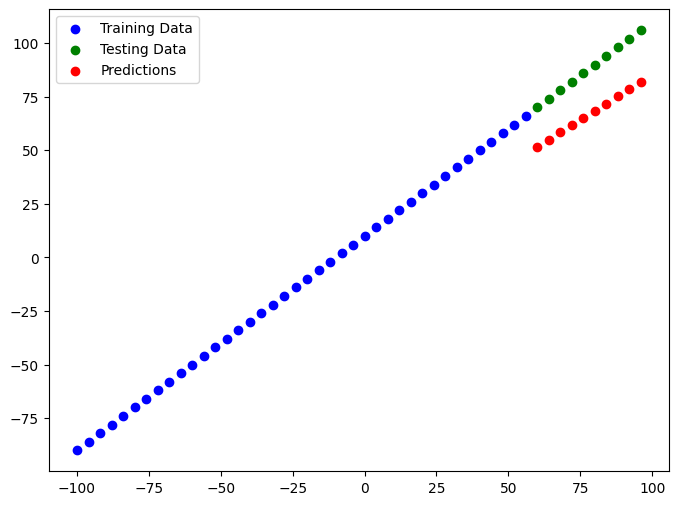

In [51]:
from ast import PyCF_ALLOW_TOP_LEVEL_AWAIT
# MAKE A PLOT PREDICTIONS FOR MODEL_1:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.265858>,
 <tf.Tensor: shape=(), dtype=float32, numpy=455.66763>)

**Build -> `model_2`**
* 2 Dense layers, trained for 100 epochs

In [53]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mse"])

#3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 13.2759 - mse: 378.8232
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 21.0669 - mse: 719.2092
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 22.2711 - mse: 736.1842
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9258 - mse: 245.2812
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 16.5312 - mse: 361.7725
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2452 - mse: 141.1679
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3025 - mse: 195.0986
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9840 - mse: 140.1228
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.8439 - mse: 2345.0403
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 26.4492 - mse: 983.1434
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 61ms/step


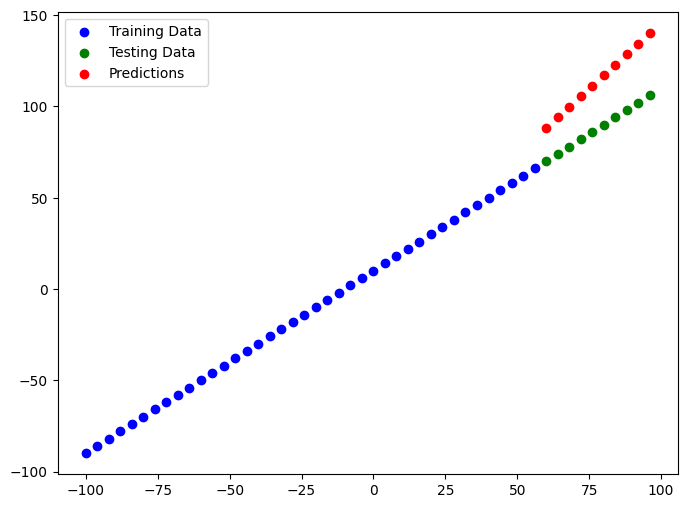

In [54]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [55]:
# Calculate model_2 evaluation metrics -
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.139227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=708.8119>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 15.2221 - mse: 495.4650
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 21.3669 - mse: 583.3348
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 28.1351 - mse: 1157.3645
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 24.2199 - mse: 851.7077
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.3786 - mse: 254.7163
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.4591 - mse: 150.3096
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.4804 - mse: 205.3896
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.9528 - mse: 144.7569
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.9072 - mse: 2360.0745
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 26.5019 - mse: 987.3102
Epoch 11/500
2/2 [============================

1/1 [==============================] - 0s 96ms/step


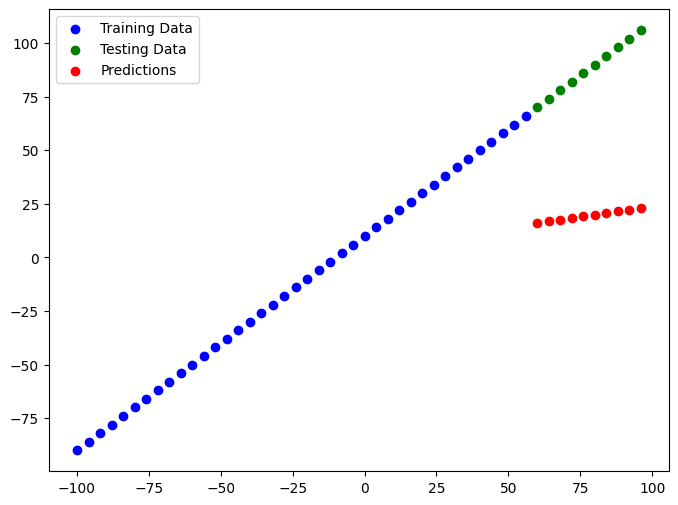

In [57]:
# Make and Plot some predictions -
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
# Lets calculate model_3 evaluation metrics-
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.41494>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4766.3477>)

## Comparing the results of our experiments :
* We have run a few experiments, let's compare the results-


In [59]:
# Let's Compare our model's results using pandas Dataframe -
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['Model', 'mae', 'mse'])
all_results

,Model,mae,mse
0,model_1,21.265858,455.667633
1,model_2,26.139227,708.811890
2,model_3,68.414940,4766.347656


In [60]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking your experiments
one really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can betedious if you are running lots of experiments.
Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the tensorflow libraryto help track modelling experiments.
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensoarBoard).

### Saving our Model:
Saving our models allows us to use them outside of Google Colab (or wherever they are trained) such as in a web application or a mobile app.
There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [61]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [62]:
# Save a model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Loading in  Saved model -

In [63]:
# Load in a SavedModel format model:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Compare to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any otehr file) from Google Colab

If you want to download your files from Google Colab:
1. You ca go to the "files" tab and right click on the file you are after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see the 2nd code cell below).

In [67]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Save a file from Google Colab to Google Drive (requires mounting of Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [69]:
!ls /content/drive/MyDrive

'Analytics Vidya Hackathon'			      'Debarun Bhattacharya.gmap'
'BEE EXAM DOCS'					       FinesDataset
 best_model_HDF5_format.h5			       IEEE-std80.pdf
'Colab Notebooks'				       Takeout
'Copy of Data Journal: Journal Entry Templates.gdoc'  'The Final MES Dump.xlsx'
 DCS
